# Harmfull Bacteria Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d kanchana1990/bacteria-dataset

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/bacteria-dataset
License(s): ODC Attribution License (ODC-By)
  0%|                                               | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.06k/4.06k [00:00<00:00, 8.38MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Harmfull Bacteria Classifiication/bacteria-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Harmfull Bacteria Classifiication')
zip_ref.close()

## Exploratory Data Analysis

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('bacteria_list_200.csv')

In [5]:
df.head()

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes


In [8]:
df.shape

(199, 4)

In [9]:
df.size

796

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null    object
 3   Harmful to Humans  199 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [11]:
df.describe().T

,count,unique,top,freq
Name,199,194,Coxiella burnetii,2
Family,199,93,Enterobacteriaceae,21
Where Found,199,120,Soil,17
Harmful to Humans,199,3,No,102


In [12]:
df.isnull().sum()

Name                 0
Family               0
Where Found          0
Harmful to Humans    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(3)

In [15]:
df['Harmful to Humans'].value_counts()

Harmful to Humans
No      102
Yes      96
 Yes      1
Name: count, dtype: int64

## Data Preprocessing

In [33]:
# Dropping duplicated rows

df.drop_duplicates(inplace=True)

In [34]:
# Dropping  Yes from Harmful to Humans column

df.drop(df[df['Harmful to Humans'] == ' Yes'].index, inplace=True)

In [35]:
df["description"] = df["Name"] + ' ' + df["Family"] + ' ' + df["Where Found"]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df.iloc[:, -1].values)

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Harmful to Humans"] = le.fit_transform(df["Harmful to Humans"].values)

In [38]:
from sklearn.model_selection import train_test_split

y = df.iloc[:, -2].values

x_train, x_test, y_train, y_test = train_test_split(X_train_counts, y, random_state=42, test_size=0.2)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(x_train)
X_test_tf = tf_transformer.transform(x_test)

## Model Building

In [40]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [42]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train_tf, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test_tf)))

print(scores)

[0.8205128205128205, 0.7692307692307693, 0.6666666666666666, 0.7435897435897436, 0.5641025641025641, 0.7435897435897436, 0.6666666666666666, 0.5384615384615384, 0.7692307692307693]


# Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.88      0.74      0.80        19

    accuracy                           0.82        39
   macro avg       0.83      0.82      0.82        39
weighted avg       0.83      0.82      0.82        39

Confusion Matrix:
 [[18  2]
 [ 5 14]]


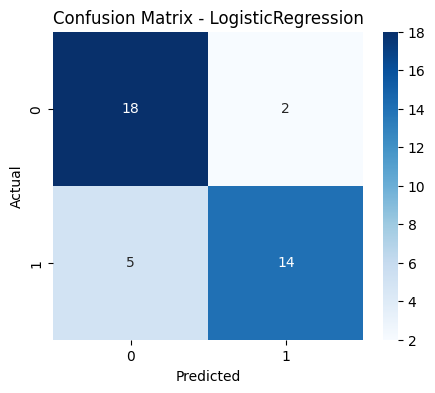

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.86      0.63      0.73        19

    accuracy                           0.77        39
   macro avg       0.79      0.77      0.76        39
weighted avg       0.79      0.77      0.76        39

Confusion Matrix:
 [[18  2]
 [ 7 12]]


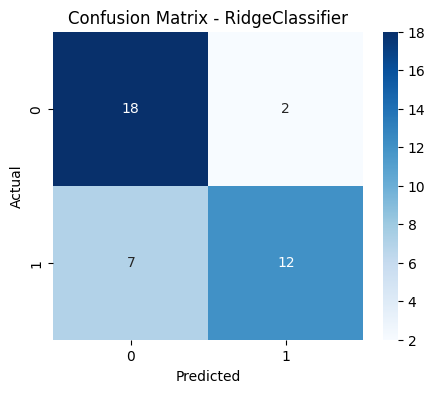

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.75      0.47      0.58        19

    accuracy                           0.67        39
   macro avg       0.69      0.66      0.65        39
weighted avg       0.69      0.67      0.65        39

Confusion Matrix:
 [[17  3]
 [10  9]]


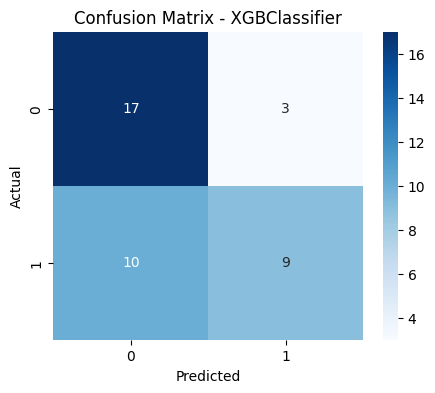

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.90      0.47      0.62        19

    accuracy                           0.72        39
   macro avg       0.78      0.71      0.70        39
weighted avg       0.77      0.72      0.70        39

Confusion Matrix:
 [[19  1]
 [10  9]]


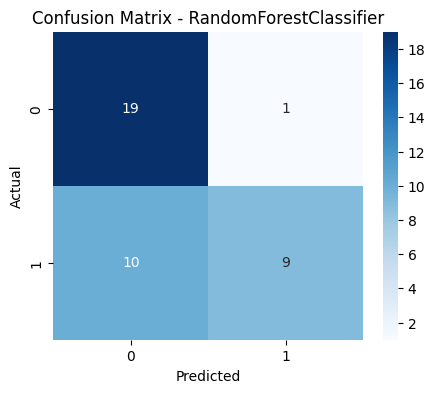

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.30      0.41        20
           1       0.53      0.84      0.65        19

    accuracy                           0.56        39
   macro avg       0.60      0.57      0.53        39
weighted avg       0.60      0.56      0.53        39

Confusion Matrix:
 [[ 6 14]
 [ 3 16]]


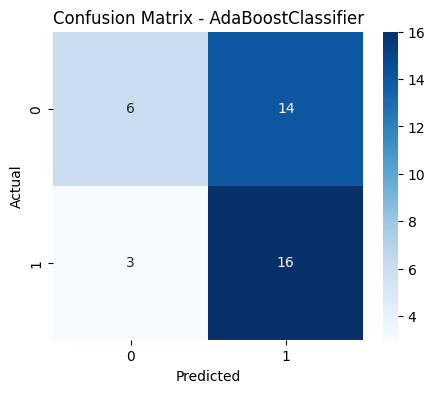

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.91      0.53      0.67        19

    accuracy                           0.74        39
   macro avg       0.79      0.74      0.73        39
weighted avg       0.79      0.74      0.73        39

Confusion Matrix:
 [[19  1]
 [ 9 10]]


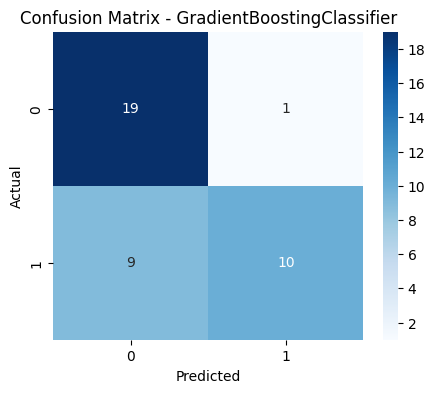

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.61      0.74      0.67        19

    accuracy                           0.64        39
   macro avg       0.65      0.64      0.64        39
weighted avg       0.65      0.64      0.64        39

Confusion Matrix:
 [[11  9]
 [ 5 14]]


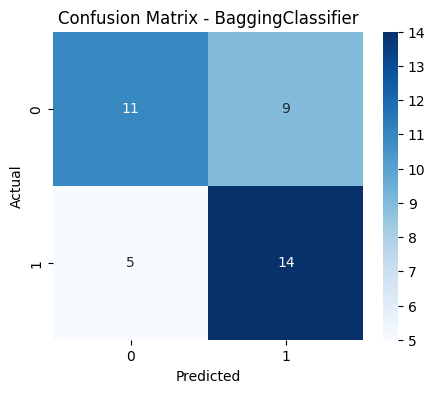

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.95      0.72        20
           1       0.83      0.26      0.40        19

    accuracy                           0.62        39
   macro avg       0.70      0.61      0.56        39
weighted avg       0.70      0.62      0.56        39

Confusion Matrix:
 [[19  1]
 [14  5]]


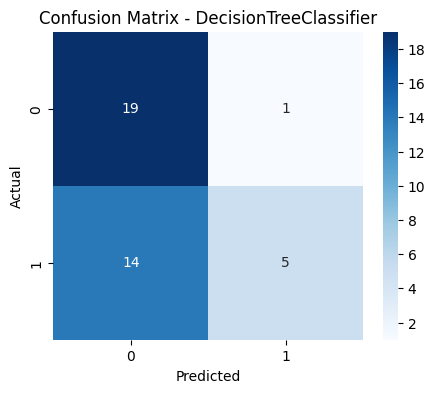

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.86      0.63      0.73        19

    accuracy                           0.77        39
   macro avg       0.79      0.77      0.76        39
weighted avg       0.79      0.77      0.76        39

Confusion Matrix:
 [[18  2]
 [ 7 12]]


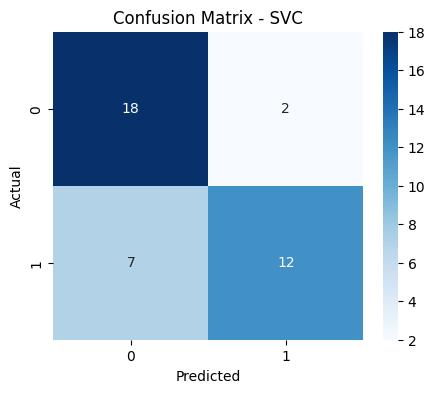

In [43]:
for model in model_li:
    model.fit(X_train_tf, y_train)
    y_pred = model.predict(X_test_tf)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()